## Análisis Exploratorio de Datos (EDA) - Titanic (Kaggle)

Dataset: https://www.kaggle.com/competitions/titanic/data

### Objetivos:
1. Analizar la calidad de los datos, detectar valores faltantes y posibles outliers.
2. Realizar visualizaciones para comprender la distribución de las variables.
3. Realizar gráficos comparativos (por ejemplo, supervivencia según clase, sexo y edad).
4. Analizar si algunas características influyen más que otras en la supervivencia.
5. Determinar si el dataset está balanceado respecto a la variable objetivo (Survived).

In [19]:
# %pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [20]:
# Carga del dataset de entrenamiento
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Carga del dataset de prueba
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. Análisis de la calidad de los datos
* Dimensiones del dataset
* Tipos de datos
* Estadísticos descriptivos básicos
* Valores faltantes

In [22]:
# Dimensiones del dataset
print("Dimensiones del dataset de entrenamiento (filas, columnas):", train_df.shape)
print("Dimensiones del dataset de prueba (filas, columnas):", test_df.shape)

# Información general (tipos de datos, nulos)
print("\nInformación del DataFrame de entrenamiento:")
train_df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas (numéricas):")
train_df.describe()

Dimensiones del dataset de entrenamiento (filas, columnas): (891, 12)
Dimensiones del dataset de prueba (filas, columnas): (418, 11)

Información del DataFrame de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estadísticas descriptivas (numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Valores faltantes por columna:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


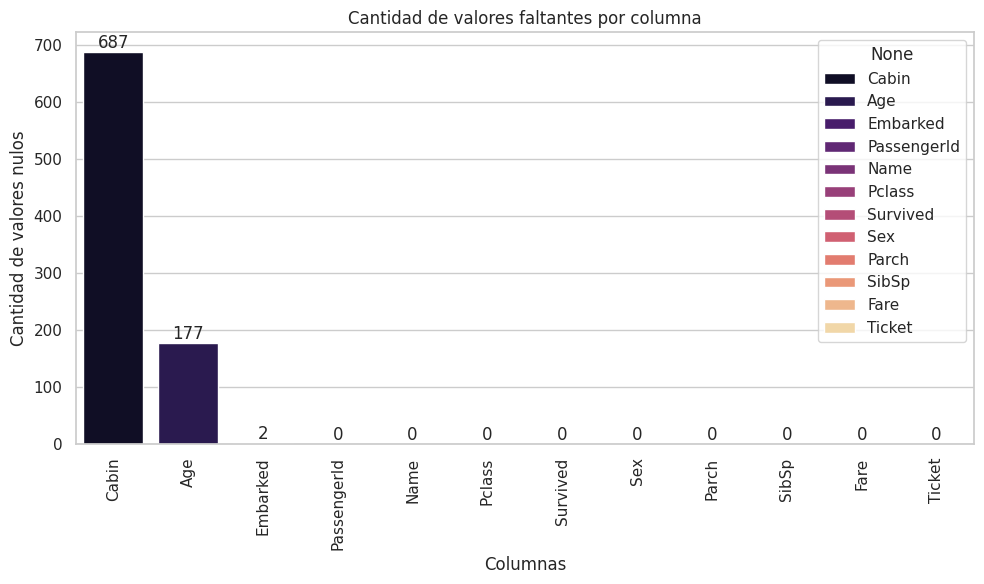

In [23]:
# Valores faltentes por columna
missing_counts = train_df.isna().sum().sort_values(ascending=False)
pd.set_option("display.max_rows", None)
print("\nValores faltantes por columna:")
print(missing_counts)

# Gráfico de valores faltantes
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=missing_counts.index,
    y=missing_counts.values,
    hue=missing_counts.index,
    palette="magma",
    legend=True
)
plt.title("Cantidad de valores faltantes por columna")
plt.ylabel("Cantidad de valores nulos")
plt.xlabel("Columnas")
plt.xticks(rotation=90)

# Agregar valores sobre las columnas
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


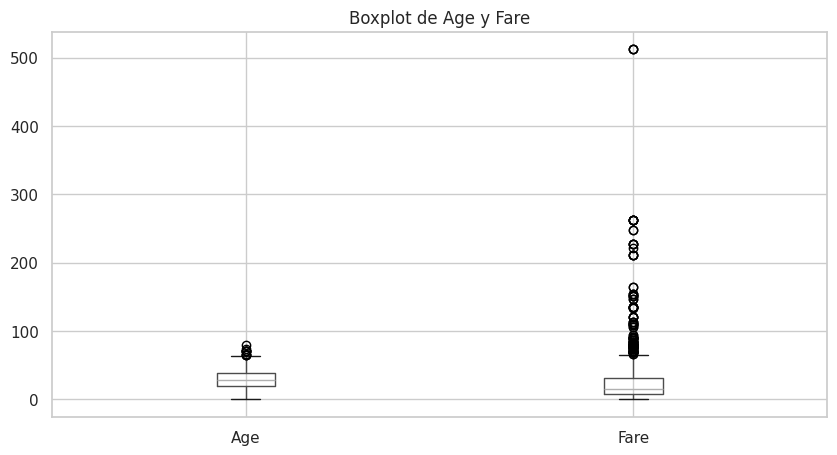

NameError: name 'df' is not defined

<Figure size 700x400 with 0 Axes>

In [24]:
#Detección de posibles outliers
# Vamos a mirar principalmente:
# - Age
# - Fare
# Y complementar con SibSp y Parch (aunque sean discretas).


# %%
num_cols = ["Age", "Fare", "SibSp", "Parch"]
print(train_df[num_cols].describe())

# Boxplots de Age y Fare
plt.figure(figsize=(10,5))
train_df[["Age", "Fare"]].boxplot()
plt.title("Boxplot de Age y Fare")
plt.show()

# Boxplot específico de Fare
plt.figure(figsize=(7,4))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot de Fare")
plt.show()


In [ ]:
# %% [markdown]
# Comentario esperado:
# - `Fare` suele tener valores muy grandes (outliers hacia la derecha).
# - `Age` puede tener valores altos, pero no necesariamente erróneos (personas mayores).
#
# En esta etapa del EDA normalmente **no** se eliminan outliers todavía,
# solo se identifican y se los tiene en cuenta para el modelado.


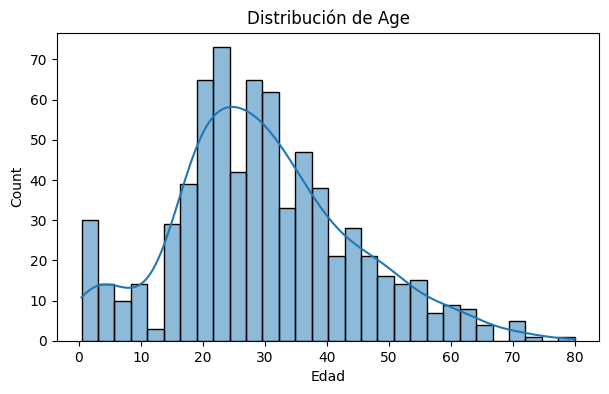

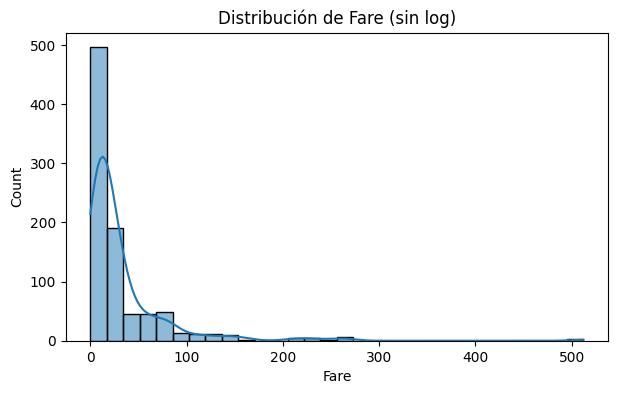

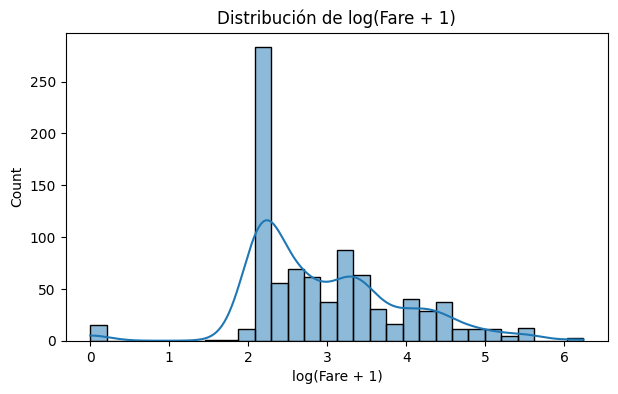

In [ ]:
# %% [markdown]
# ## 2. Distribución de las variables
# ### 2.1 Variables numéricas (Age, Fare)


# %%
# Histograma de Age
plt.figure(figsize=(7,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=30)
plt.title("Distribución de Age")
plt.xlabel("Edad")
plt.show()

# Histogramas de Fare (sin log y con log)
plt.figure(figsize=(7,4))
sns.histplot(df["Fare"], kde=True, bins=30)
plt.title("Distribución de Fare (sin log)")
plt.xlabel("Fare")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(np.log1p(df["Fare"]), kde=True, bins=30)
plt.title("Distribución de log(Fare + 1)")
plt.xlabel("log(Fare + 1)")
plt.show()


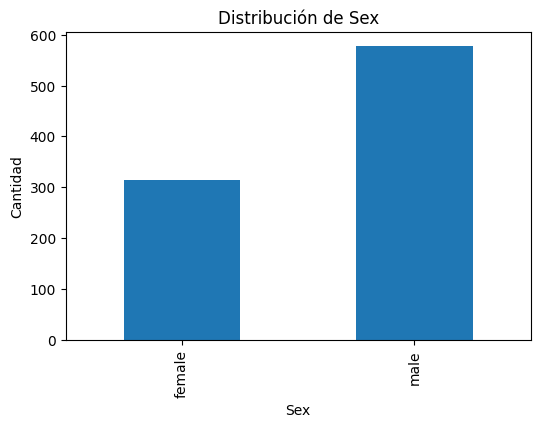

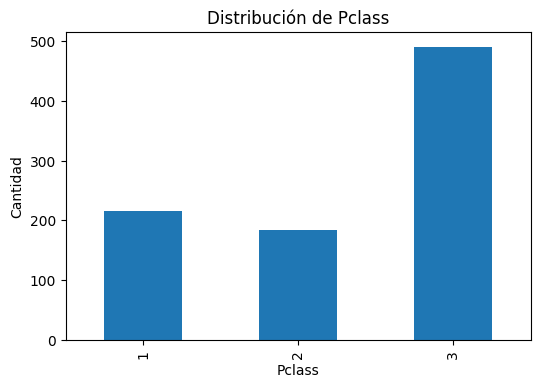

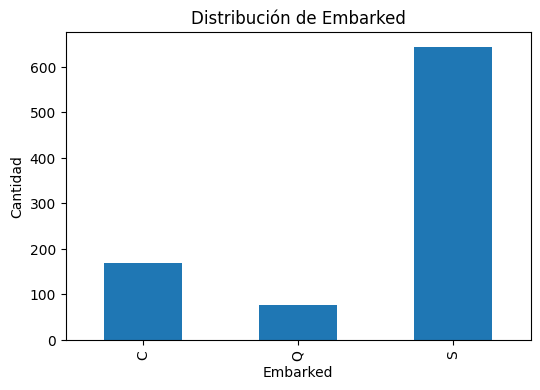

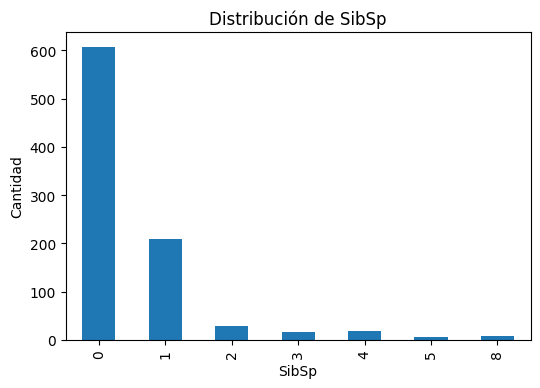

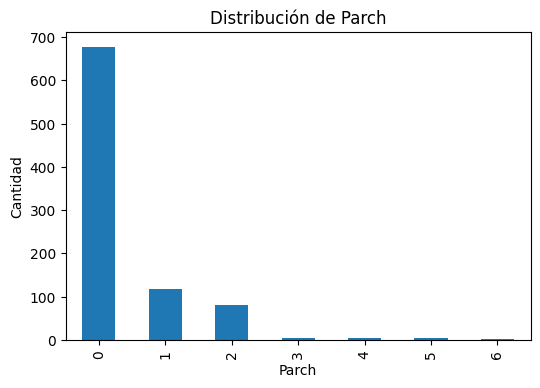

In [ ]:
# %% [markdown]
# ### 2.2 Variables categóricas (Sex, Pclass, Embarked, SibSp, Parch)
# Vamos a ver la distribución de algunas variables categóricas / discretas.


# %%
cat_cols = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Cantidad")
    plt.xlabel(col)
    plt.show()


In [ ]:
# %% [markdown]
# Comentario esperado:
# - En `Sex` suele haber más hombres que mujeres.
# - En `Pclass` suele haber mayoría de pasajeros en 3ª clase.
# - `Embarked` suele concentrarse en un puerto principal (por ejemplo, 'S').
# - `SibSp` y `Parch` muestran cantidades pequeñas (la mayoría viaja con pocos familiares).


Recuento de Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Proporciones de Survived:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


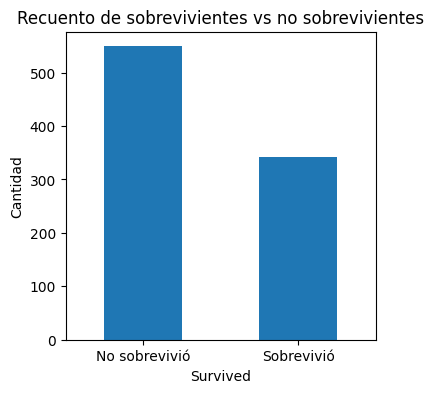

In [ ]:
# %% [markdown]
# ## 3. Gráficos comparativos con la variable objetivo (Survived)
# - Supervivencia global
# - Supervivencia por sexo
# - Supervivencia por clase
# - Combinación sexo + clase
# - Supervivencia según edad / grupos de edad


# %%
# 3.1 Supervivencia global
surv_counts = df["Survived"].value_counts()
surv_props = df["Survived"].value_counts(normalize=True)

print("Recuento de Survived:")
print(surv_counts)
print("\nProporciones de Survived:")
print(surv_props)

plt.figure(figsize=(4,4))
surv_counts.plot(kind="bar")
plt.title("Recuento de sobrevivientes vs no sobrevivientes")
plt.xticks([0, 1], ["No sobrevivió", "Sobrevivió"], rotation=0)
plt.ylabel("Cantidad")
plt.show()


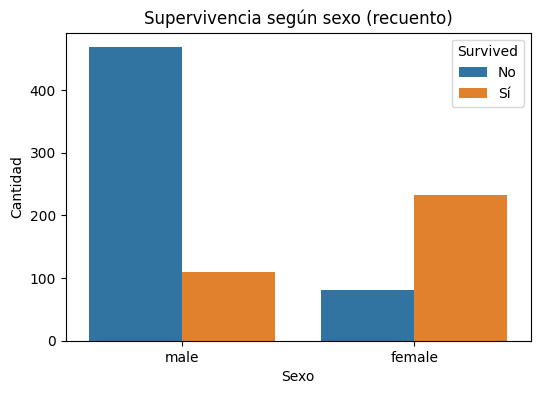


Tasa de supervivencia por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# %% 
# 3.2 Supervivencia por sexo

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Supervivencia según sexo (recuento)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="Survived", labels=["No", "Sí"])
plt.show()

print("\nTasa de supervivencia por sexo:")
print(df.groupby("Sex")["Survived"].mean())


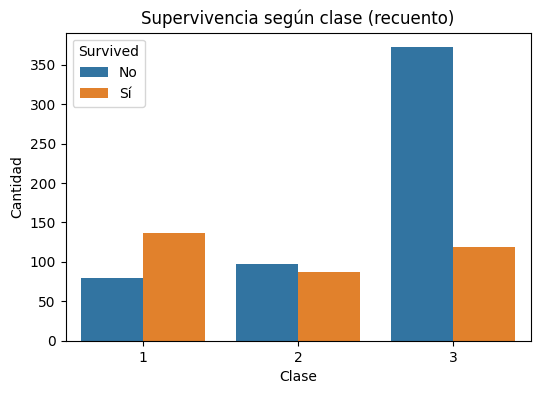


Tasa de supervivencia por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# %% 
# 3.3 Supervivencia por clase (Pclass)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Supervivencia según clase (recuento)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend(title="Survived", labels=["No", "Sí"])
plt.show()

print("\nTasa de supervivencia por clase:")
print(df.groupby("Pclass")["Survived"].mean())


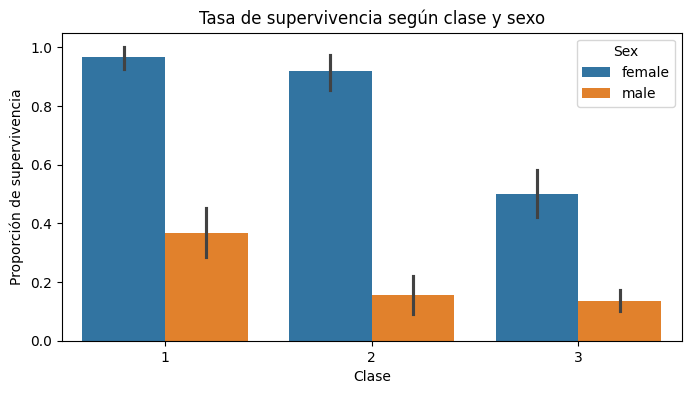


Tasa de supervivencia por clase y sexo:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [ ]:
# %% 
# 3.4 Supervivencia por clase y sexo combinados

plt.figure(figsize=(8,4))
sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", estimator=np.mean)
plt.title("Tasa de supervivencia según clase y sexo")
plt.xlabel("Clase")
plt.ylabel("Proporción de supervivencia")
plt.show()

print("\nTasa de supervivencia por clase y sexo:")
print(df.groupby(["Pclass", "Sex"])["Survived"].mean())


C:\Users\rafae\AppData\Local\Temp\ipykernel_16940\2371191265.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Survived"] == 0], x="Age", shade=True, label="No sobrevivió")
C:\Users\rafae\AppData\Local\Temp\ipykernel_16940\2371191265.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Survived"] == 1], x="Age", shade=True, label="Sobrevivió")


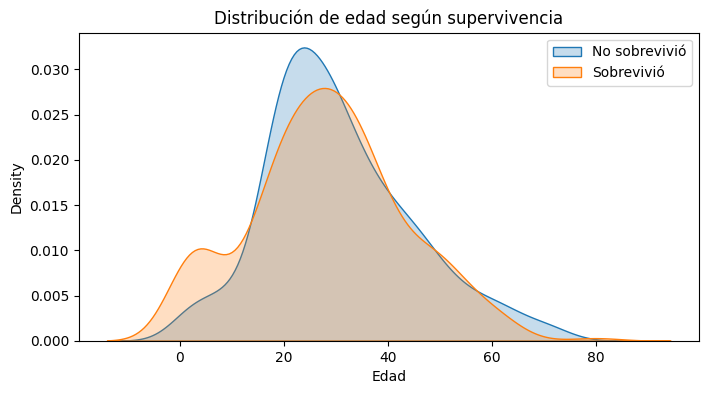

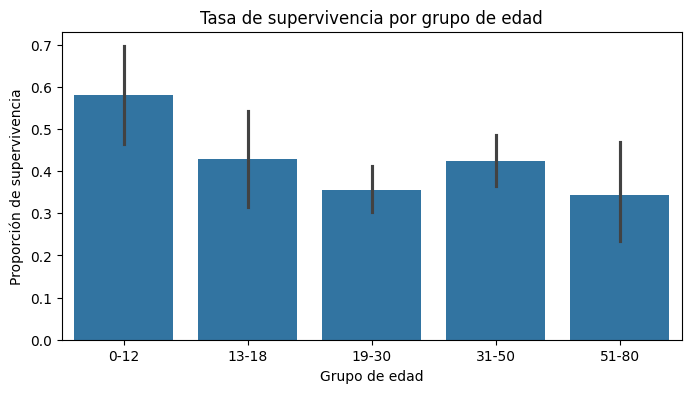


Tasa de supervivencia por grupo de edad:
AgeBin
0-12     0.579710
13-18    0.428571
19-30    0.355556
31-50    0.423237
51-80    0.343750
Name: Survived, dtype: float64


C:\Users\rafae\AppData\Local\Temp\ipykernel_16940\2371191265.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeBin")["Survived"].mean())


In [ ]:
# %% 
# 3.5 Supervivencia según edad (distribuciones y grupos de edad)

# Distribución de edad según Survived (KDE)
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df["Survived"] == 0], x="Age", shade=True, label="No sobrevivió")
sns.kdeplot(data=df[df["Survived"] == 1], x="Age", shade=True, label="Sobrevivió")
plt.title("Distribución de edad según supervivencia")
plt.xlabel("Edad")
plt.legend()
plt.show()

# Crear grupos de edad
bins = [0, 12, 18, 30, 50, 80]
labels = ["0-12", "13-18", "19-30", "31-50", "51-80"]
df["AgeBin"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,4))
sns.barplot(data=df, x="AgeBin", y="Survived", estimator=np.mean)
plt.title("Tasa de supervivencia por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Proporción de supervivencia")
plt.show()

print("\nTasa de supervivencia por grupo de edad:")
print(df.groupby("AgeBin")["Survived"].mean())


In [ ]:
# %% [markdown]
# Comentario esperado:
# - Comparar visualmente si los niños (0-12) tienen una supervivencia mayor.
# - Ver si hay diferencias entre jóvenes adultos y personas mayores.


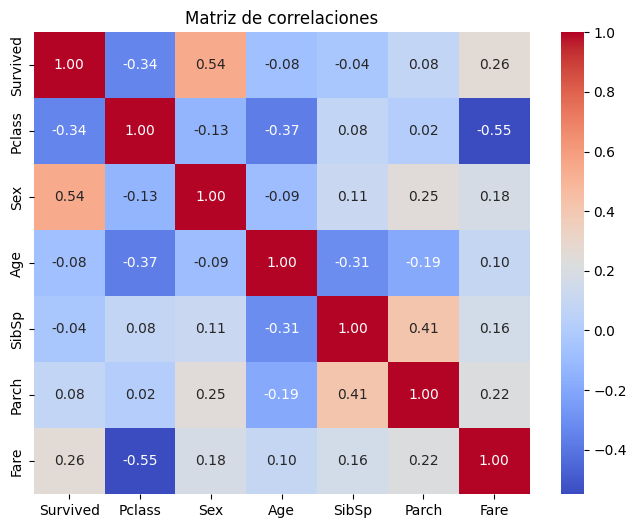

In [ ]:
# %% [markdown]
# ## 4. ¿Qué características influyen más en la supervivencia?
# No vamos a entrenar todavía un modelo complejo, pero podemos:
# - Mirar correlaciones entre variables numéricas (incluyendo una codificación simple de Sex).
# - Comparar tasas de supervivencia por categorías para variables relevantes.


# %%
# Copia del DataFrame para codificar variables
df_corr = df.copy()

# Codificar Sex como variable numérica
df_corr["Sex"] = df_corr["Sex"].map({"male": 0, "female": 1})

# Seleccionamos algunas columnas numéricas relevantes
corr_cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
corr_matrix = df_corr[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()


In [ ]:
# %% 
# Tasas de supervivencia por categorías (función auxiliar)

def survival_rate_by(column_name):
    """
    Devuelve la tasa de supervivencia media por categoría
    de la columna especificada.
    """
    return df.groupby(column_name)["Survived"].mean().sort_values(ascending=False)

print("Tasa de supervivencia por Sex:")
print(survival_rate_by("Sex"), "\n")

print("Tasa de supervivencia por Pclass:")
print(survival_rate_by("Pclass"), "\n")

print("Tasa de supervivencia por Embarked:")
print(survival_rate_by("Embarked"), "\n")

print("Tasa de supervivencia por AgeBin:")
print(survival_rate_by("AgeBin"))


Tasa de supervivencia por Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Tasa de supervivencia por Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Tasa de supervivencia por Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 

Tasa de supervivencia por AgeBin:
AgeBin
0-12     0.579710
13-18    0.428571
31-50    0.423237
19-30    0.355556
51-80    0.343750
Name: Survived, dtype: float64


C:\Users\rafae\AppData\Local\Temp\ipykernel_16940\558737967.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(column_name)["Survived"].mean().sort_values(ascending=False)


In [ ]:
# %% [markdown]
# Comentario esperado para el informe:
# - `Sex` suele mostrar una fuerte relación con `Survived` (las mujeres sobreviven más).
# - `Pclass` también muestra que la 1ª clase tiene mayor supervivencia que la 3ª.
# - `Fare` suele correlacionar porque se relaciona con el nivel socioeconómico.
# - `Age` tiene influencia, pero la correlación lineal puede no ser tan fuerte
#   (el efecto se ve mejor al agrupar en bins).
#
# En una etapa posterior, podrías entrenar un modelo (por ejemplo, un árbol de decisión)
# y ver las "feature importances" para cuantificar mejor la importancia de cada variable.


Recuento de la variable objetivo (Survived):
Survived
0    549
1    342
Name: count, dtype: int64

Proporción de la variable objetivo (Survived):
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


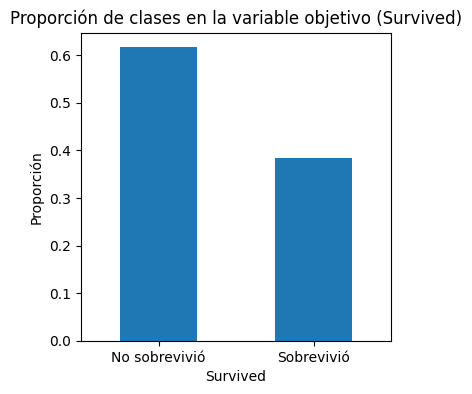

In [ ]:
# %% [markdown]
# ## 5. Balanceo de la variable objetivo (Survived)
# Verificamos si el dataset está balanceado entre:
# - 0: No sobrevivió
# - 1: Sobrevivió


# %%
target_counts = df["Survived"].value_counts()
target_props = df["Survived"].value_counts(normalize=True)

print("Recuento de la variable objetivo (Survived):")
print(target_counts)

print("\nProporción de la variable objetivo (Survived):")
print(target_props)

plt.figure(figsize=(4,4))
target_props.plot(kind="bar")
plt.title("Proporción de clases en la variable objetivo (Survived)")
plt.xticks([0, 1], ["No sobrevivió", "Sobrevivió"], rotation=0)
plt.ylabel("Proporción")
plt.show()


In [ ]:
# %% [markdown]
# Comentario esperado:
# - El dataset no está completamente balanceado (suele haber más personas que no sobrevivieron).
# - Sin embargo, el desbalance típico (aprox. 60% vs 40%) no es extremo.
# - Para modelos más sensibles al desbalance se pueden considerar técnicas como:
#   - Ajuste de pesos de clase
#   - Submuestreo / sobremuestreo
#   - SMOTE u otros métodos de balanceo
#
# Este EDA ya cubre:
# 1. Calidad de datos (nulos y outliers).
# 2. Distribución de variables.
# 3. Comparaciones de supervivencia por clase, sexo y edad.
# 4. Influencia de características mediante correlaciones y tasas de supervivencia.
# 5. Evaluación del balance de la variable objetivo.
#
# A partir de aquí, el siguiente paso natural sería:
# - Definir una estrategia de preprocesamiento (imputación, encoding, normalización).
# - Entrenar modelos de clasificación (Logistic Regression, Árboles, Random Forest, etc.).
